# Estimating Sentiment Orientation with SKLearn

Jason Brietstone jb4562@nyu.edu & Amar Patel acp455@stern.nyu.edu

Natural language processsing is a booming field in the finance industry because of the massive amounts of user generated data that has recently become avaiable for analysis. Websites such as Twitter, StockTwits and Facebook, if analyzed correctly, can yield very relevient insights for predictions. Natural language processing can be a very daunting task because of how many layers of analysis you can add and the immense size of the English language. NLTK is a Python module and data repository, which serves as a tool for easy language processing. This paper proposes a simple method of deriving either a positive or negative sentiment orientation and highlights a few of the useful tools NLTK offers. 

Firstly we need to download the NLTK repository, which is achieved by running nltk.download(). You can choose to download all text examples or download just the movie reviews which we use in this example into the corpus folder.

In [125]:
import nltk
#nltk.download()

Wordnet is a NLTK sub package that can be used to link togther words with their respective synonyms, antonyms, part of speech and definitions. This is a very powerful tool because creating a similar wordnet requires a significant amount of databasing and organization. 

In [126]:
from nltk.corpus import wordnet 
#example word: plan, you may change this word to anything that has synonyms and antonyms
test_word = 'good'
syns = wordnet.synsets(test_word)

# Lemma is another word for something simialr to a synonym 
print(syns[1].lemmas()[1].name()) 

goodness


Here we are going to verify that the we are using the version of the word we think we are using by pulling the definition

In [127]:
print(syns[0].definition())

benefit


We can also test test the word by using the .examples() method which will yield examples of the word in question 

In [128]:
#examples
print(syns[0].examples())

['for your own good', "what's the good of worrying?"]


For each word we can create a comprehensive list of all synonyms and antonyms by creating a for loop.

In [129]:
synonyms =[]
antonyms=[]
for syn in wordnet.synsets(test_word):
    for l in syn.lemmas():
        #gather all lemmas of each synonym in the synonym set
        synonyms.append(l.name())
        if l.antonyms():
            #gather all antonyms of each lemma of each synonym in the synonym set
            antonyms.append(l.antonyms()[0].name())
            
print(set(synonyms))    
print(set(antonyms))

{'upright', 'unspoiled', 'full', 'estimable', 'well', 'good', 'unspoilt', 'soundly', 'beneficial', 'adept', 'skilful', 'serious', 'trade_good', 'honest', 'salutary', 'dependable', 'skillful', 'goodness', 'just', 'near', 'in_force', 'ripe', 'sound', 'thoroughly', 'commodity', 'safe', 'expert', 'dear', 'right', 'honorable', 'effective', 'proficient', 'secure', 'respectable', 'undecomposed', 'practiced', 'in_effect'}
{'ill', 'evilness', 'evil', 'bad', 'badness'}


### Wu and Palmer System
In the English language, there are multiple different ways of expressing an idea. Very often, people think that by using a synonym, the meaning of the sentence is unchanged. Under many circumstances, this is true, however to the computer a slight word change can make a big difference in the returned list of lemmas and antonyms. One method we can use to determine the similarity between to words to make sure any syntax changes we make dont alter the meaning of the word is to use the Wu and Palmer system of determing semantic similarity by calling on the wup_similarity method.

In [130]:
# yields % similarity of the words 
w1 = wordnet.synset('ship.n.01') # ship , refrences that it is the noun ship, 1st entry of similar words
w2 = wordnet.synset('boat.n.01')# boat
print('word similarity is',w1.wup_similarity(w2)*100,'%') 

word similarity is 90.9090909090909 %


In [131]:
w1 = wordnet.synset('ship.n.01') # ship , the noun ship, 1st entry of similar word 
w2 = wordnet.synset('car.n.01')# boat
print('word similarity is',w1.wup_similarity(w2)*100,'%') 

word similarity is 69.56521739130434 %


In [132]:
w1 = wordnet.synset('ship.n.01') # ship , the noun ship, 1st entry of similar word 
w2 = wordnet.synset('cat.n.01')# boat
print('word similarity is',w1.wup_similarity(w2)*100,'%') 

word similarity is 32.0 %


***TurnItIn as a use case***

Many students try to buy essays online. The services that sell those papers often use a form of natrual language processing to change the words with synonyms. The above method could determine if that has been occuring by gauging the similarities to other papers 

### Sentiment Analysis through Tokenization
Now we are going to begin to develop our module for determining sentiment. We are going to achieve this by tokenizing the movie reviews in our set. Tokenizing is the process of splitting blocks of text in to list of individual words. By doing this we can determining if the occurence of a particular word can be used as an indicator for posotive or negative sentiment. When doing this, we hope to see results that do NOT use any non-substantial words such as conjuctions (i.e. 'the', 'an', 'or', 'and'). 

This method does not have to be used only for determining sentiment. Other potential use cases could include determining the subject of a block of text or determining the origin of the author by indicators that would represent local slangs. There are 2 main benefits to using this method:
1. If we were to create our own list of positive or negative indicators to test against, we may risk missing out on words that could be impactful
2. We remove a significant amount of statical bias by not assuming a words impact but by judging based on what has already occured

In [133]:
import random 
from nltk.corpus import movie_reviews #1000 labeled posotive or negative movie reviews 
documents = [(list(movie_reviews.words(fileid)), category) # list of tuples for features 
            for category in movie_reviews.categories()
            for fileid in movie_reviews.fileids(category)]

In [134]:
#documents[1] # prints the first movie review in tokenized format

In [135]:
random.shuffle(documents)# removes bias by not training and testing on the same set

all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())
all_words = nltk.FreqDist(all_words)# makes frequency distrubution

print(all_words.most_common(10)) # prints(10 most common words , frequency)
print("stupid occured ",all_words['stupid'],'times') # prints frequency of stupid 

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822)]
stupid occured  253 times


Above we created a list all_words of all the used words, then turned that into a frequency distrubution and printed the top 15 most common words, then we printed how many times the word 'stupid' occured in the list all_words. Notice how these are obviously all conjunctions, common prepositions, and words like "the, that" as well as a hyphen.

Below, we are going to create our training set and testing set. First we pull out the keys from our all_words frequency distrubution. Considering all_words is a dictionary of ("the word", Frequency) we will now have each word. Our feature set, which is the raw data modified to show our distingushing feature, has the words that  what we are defining in our training and testing set. 

In [136]:
word_features = list(all_words.keys())[:3000]
def find_features(document):
    words = set(document)    # converting list to set makes all the words not the amount 
    features ={}
    for w in word_features:
        features[w] = (w in words)
    return features 

featuresets = [(find_features(rev),category) for (rev, category) in documents] 

'''
Here we create a testing and training set by arbitrariy splitting up
the 3000 words in word_features
'''
training_set =featuresets[1900:] 
testing_set = featuresets[:1900]

featuresets[0][1]
#here, we reference the dictionary (list of features, pos or neg) to give the second entry

'pos'

First, we are going to test using a simple NaiveBayesClassifier provided by NLTK. We will have it return the prediction accuracy and the most informative features. We hope to see two things that will demonstrate the efficiency of this:
1. No conjuctions (i.e. and, the, etc.) occur in the most informative feature set 
2. High algo accuracy 

In [137]:
classifier =nltk.NaiveBayesClassifier.train(training_set)
print("original naieve bayes algo accuracy:", nltk.classify.accuracy(classifier,testing_set)*100)
classifier.show_most_informative_features(15)

original naieve bayes algo accuracy: 57.99999999999999
Most Informative Features
                supposed = True              neg : pos    =      5.2 : 1.0
                 somehow = True              pos : neg    =      4.8 : 1.0
                    sets = True              pos : neg    =      4.5 : 1.0
                     six = True              pos : neg    =      4.5 : 1.0
                    sees = True              pos : neg    =      3.8 : 1.0
                   match = True              pos : neg    =      3.8 : 1.0
             traditional = True              pos : neg    =      3.1 : 1.0
                  proves = True              pos : neg    =      3.1 : 1.0
                   girls = True              pos : neg    =      3.1 : 1.0
                   campy = True              neg : pos    =      2.9 : 1.0
                    both = True              pos : neg    =      2.8 : 1.0
                   clear = True              pos : neg    =      2.8 : 1.0
                   

As you can see above the Naive Bayes Classifier is not a very accurate algorithim. To increase accuracy, we are going to try to use as many diffrent classifier methods as possible to test the data on. From there we are going to define a function that creates a voting system where each classifier votes. The outcome is the average of the votes, for example if 5/8 classifiers say positive, we will vote positive. We are also going to print the classification and the confidence of the algo. 

In [138]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB , BernoulliNB
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode 

In [139]:
class VoteClassifier(ClassifierI):
    def __init__(self,*classifiers):
        self._classifiers = classifiers
    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)
    def confidence(self, features):
        
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

In [140]:
MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print("SGDClassifier_classifier accuracy percent:", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

#Another possible test, but is known to be largely inaccurate
#SVC_classifier = SklearnClassifier(SVC())
#SVC_classifier.train(training_set)
#print("SVC_classifier accuracy percent:", (nltk.classify.accuracy(SVC_classifier, testing_set))*100)

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)

MNB_classifier accuracy percent: 56.89473684210527
BernoulliNB_classifier accuracy percent: 56.21052631578948
LogisticRegression_classifier accuracy percent: 56.84210526315789
SGDClassifier_classifier accuracy percent: 57.263157894736835
LinearSVC_classifier accuracy percent: 56.42105263157895
NuSVC_classifier accuracy percent: 57.52631578947368


Above we printed the accuracy for all the classifiers and their respective performance. Despite their individual accuracies, it is important to note that they were generally in agreement. Below, we are printing the confidence, which is calcualted by the amount of classifiers in agreement. This removes any time that individual classifeirs may have been lacking in their ability to predict a ceartin secenrio. However, it will more heavily weight any individual machine learning funcation that may have been more accurate than even the majority. 

Accuracy optimization depends on the data set in question. To optimize, you must try running all individual classifiers, and then selectively remove those that failed to meet sufficient accuracy. For further investigation, one could leverage a data set that is structured in a way that pos or neg reviews are grouped in order to test the accuracy for just posotive or negative reviews. You may find that some are biased towards one side and can be removed for better accuracy. Obviously, regardless of any investigation you make, you also likely be able to increase the accuracy and applicability of the algothim by using a larger training set. Remember, in practice, using a larger training set will increase the time and  processing power necissary for completion, which is relevant if the speed of execution is important.

In [141]:
voted_classifier = VoteClassifier(classifier,
                                  NuSVC_classifier,
                                  LinearSVC_classifier,
                                  SGDClassifier_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)

print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)

voted_classifier accuracy percent: 57.315789473684205


In [142]:
#Example Classifications of the first two tests
print("Classification 0:", voted_classifier.classify(testing_set[0][0]), "Confidence %:",voted_classifier.confidence(testing_set[0][0])*100)
print("Classification 1:", voted_classifier.classify(testing_set[1][0]), "Confidence %:",voted_classifier.confidence(testing_set[1][0])*100)

Classification 0: neg Confidence %: 85.71428571428571
Classification 1: neg Confidence %: 71.42857142857143


### Now, we will find out how confident each of these tests were:

In [143]:
def make_confidence(number_of_tests):
    confidence = []
    for x in range (0,number_of_tests):
        confidence.append(voted_classifier.confidence(testing_set[x][0])*100)
    return confidence 

import matplotlib.pyplot as plt
import pandas as pd 

y = make_confidence(1000) #use all 1000 tests
x = range(0, len(y))
#create a dictionary to sort data
count_data = dict((i, y.count(i)) for i in y)

Now, we can figure out what is the distribution of confidence, what the average and standard deviation are, to get an idea of its true accuracy

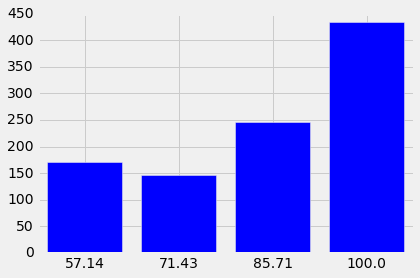

In [144]:
%matplotlib inline
from decimal import Decimal
import collections

#Sort the Dictionary
od = collections.OrderedDict(sorted(count_data.items()))

plt.style.use('fivethirtyeight')
plt.bar(range(len(od)), od.values(), align='center')
plt.xticks(range(len(od)), [float(Decimal("%.2f" % key)) for key in od.keys()])
plt.show()

This data is interesting.
First, the x labels show four possible options
That is because the voting process decides on a simple majority, which in this case, is best out of seven

57.14% represents 4/7, 71.43% is 5/7, 85.71% is 6/7 and 100.0% is 7/7

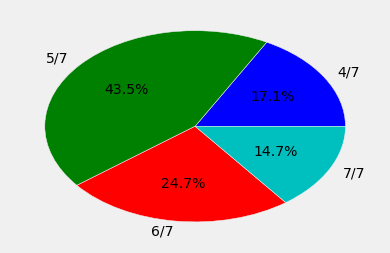

In [145]:
labels = ['4/7','5/7','6/7','7/7']
plt.pie(list(count_data.values()), labels = labels, autopct='%1.1f%%')
plt.show()

This shows us that only a smaller of the time do all 7 tests agree while the largest percentage of the time, only 5/7 tests agree. This points to the limitations of the tests we use in this example

In [146]:
import numpy as np
mean = np.mean(y, dtype=np.float64)
print("The mean confidence level is: ", mean)
stdev = np.std(y, dtype = np.float64)
print("The standard deviation of the confidence is: ", stdev)

The mean confidence level is:  84.9428571429
The standard deviation of the confidence is:  16.0552871322


In [147]:
#Linear Regression
import statsmodels.api as sm
from statsmodels import regression

Factor models are a way of explaining the results via a linear combination of its inherent alpha as well as exposure to other indicators. The general form of a factor model is

$$Y = \alpha + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n$$

In [148]:
# Let's define everything in familiar regression terms
X = x
Y = y

def linreg(x,y):
    # We add a constant so that we can also fit an intercept (alpha) to the model
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    # Remove the constant now that we're done
    x = x[:, 1]
    #print(model.params)
    return model.params[0], model.params[1]

#alpha and beta 
alpha, beta = linreg(X,Y)
print ('alpha: ' + str(alpha))
print ('beta: ' + str(beta))

alpha: 87.1876980163
beta: -0.00449417592275


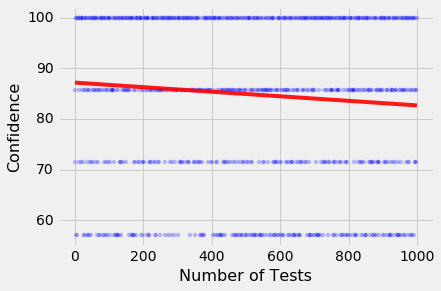

In [149]:
X2 = np.linspace(X.start, X.stop)
Y_hat = X2 * beta + alpha

plt.scatter(X, Y, alpha=0.25) # Plot the raw data
plt.xlabel("Number of Tests", fontsize = "16")
plt.ylabel("Confidence", fontsize = "16")
plt.axis('tight')

 # Add the regression line, colored in red
plt.plot(X2, Y_hat, 'r', alpha=0.9);

## Conclusion

In the future, we hope to process Twitter information, newspaper articles, and other public data that we can analyze for sentiment analysis regarding any topic. We can adjust the parameters of each machine learning classifier to optimize how the data is read through for the best results, which in turn exchanges processing power for better answers.

We hope you learned something about natural language processing. We admit that there is definite room for improvement. These are only the beginning steps to use and implement machine learning and natural language processing. This represents a huge step toward how machines are able to understand the English language much like humans do, and most likely, even better than we do.

Special thanks to pythonprogramming.com for online guidance through this project.